### Testing Evo

#### Imports

In [1]:
import torch
from IPython.display import display, HTML, Image
from torch_geometric.loader import DataLoader

from settings import Settings
from generator import generate_organism
from GNCAConv import Conv
from visualizer import Visualizer
from evo_trainer import Evo_Trainer
from enums import EnvironmentType, ModelType

#### Train the network

In [2]:
popsize = 20
generations = 1000
name = 'hidden4'

settings = Settings(
    device = torch.device('cpu'),
    batch_size = 4,
    n = 100,
    clusters = 60,
    cluster_size = 30,
    food_amount = 1000,
    scale = 4,
    wrap_around = True,
    model_type = ModelType.LocalOnly,
    env_type = EnvironmentType.Clusters,

    radius = 0.04,
    radius_food_scale = 5,
    consume_radius_scale = 3/4, 
    consumption_edge_required = 3,
    noise = 0.002,
    energy_required_to_replicate = 50,
)

In [3]:
#TODO ADD settings like std of clusters..
trainer = Evo_Trainer(settings, popsize)
network = Conv(settings=settings)

2023-04-04 18:26:28,647	INFO worker.py:1528 -- Started a local Ray instance.


[2023-04-04 18:26:37] INFO     < 5670> evotorch.core: Instance of `Custom_NEProblem` (id:4360584304) -- The `dtype` for the problem's decision variables is set as torch.float32
[2023-04-04 18:26:37] INFO     < 5670> evotorch.core: Instance of `Custom_NEProblem` (id:4360584304) -- `eval_dtype` (the dtype of the fitnesses and evaluation data) is set as torch.float32
[2023-04-04 18:26:37] INFO     < 5670> evotorch.core: Instance of `Custom_NEProblem` (id:4360584304) -- The `device` of the problem is set as cpu
[2023-04-04 18:26:37] INFO     < 5670> evotorch.core: Instance of `Custom_NEProblem` (id:4360584304) -- The number of actors that will be allocated for parallelized evaluation is 10
[2023-04-04 18:26:37] INFO     < 5670> evotorch.core: Instance of `Custom_NEProblem` (id:4360584304) -- Number of GPUs that will be allocated per actor is None


/Users/martinholst/miniconda3/envs/AML/lib/python3.10/site-packages/evotorch/tools/misc.py:1107: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  result = torch.tensor(data, **kwargs)


In [4]:
generations = 1

In [5]:
trainer.train(generations, name)

         iter : 1
     stepsize : ReadOnlyTensor(0.0399)
pop_best_eval : 5.255000114440918
  median_eval : 0.6600000262260437
    mean_eval : 1.4880001544952393

         iter : 2
     stepsize : ReadOnlyTensor(0.0398)
pop_best_eval : 21.334999084472656
  median_eval : 13.210000038146973
    mean_eval : 12.57800006866455

         iter : 3
     stepsize : ReadOnlyTensor(0.0397)
pop_best_eval : 17.5674991607666
  median_eval : 7.037499904632568
    mean_eval : 6.965875148773193

         iter : 4
     stepsize : ReadOnlyTensor(0.0396)
pop_best_eval : 29.299999237060547
  median_eval : 12.479999542236328
    mean_eval : 15.309000015258789

         iter : 5
     stepsize : ReadOnlyTensor(0.0396)
pop_best_eval : 15.555000305175781
  median_eval : 7.662499904632568
    mean_eval : 8.3097505569458

         iter : 6
     stepsize : ReadOnlyTensor(0.0395)
pop_best_eval : 19.545000076293945
  median_eval : 15.835000038146973
    mean_eval : 14.547998428344727

         iter : 7
     stepsize 

KeyboardInterrupt: 

In [ ]:
network = trainer.get_trained_network()

In [ ]:
#trainer.logger_df.from_csv('../logger/' + name + '.csv')
#network.load_state_dict(torch.load('../models/' + name + '.pth'))

In [ ]:
#network = trainer.problem.parameterize_net(trainer.searcher.status['best'][0])
network = trainer.problem.parameterize_net(trainer.searcher.status['center'][0])
#network = trainer.problem.parameterize_net(trainer.searcher.status['obj0_pop_best'])

In [ ]:
#trainer.searcher.status

#### Visualize trained network

In [ ]:
graphs = [generate_organism(settings).toGraph() for _ in range(settings.batch_size)]
loader = DataLoader(graphs, batch_size=settings.batch_size)
graph = next(iter(loader))
visualizer = Visualizer(settings)
network.batch_size = settings.batch_size
network(graph, 0)

DataBatch(x=[6800, 11], edge_index=[1, 0], device=[4], subsize=[4], velocity=[4], border_cost=[4], food_reward=[4], dead_cost=[4], visible_food=[4], food_avg_dist=[4], food_avg_degree=[4], food_search_movement=[4], batch=[6800], ptr=[5])

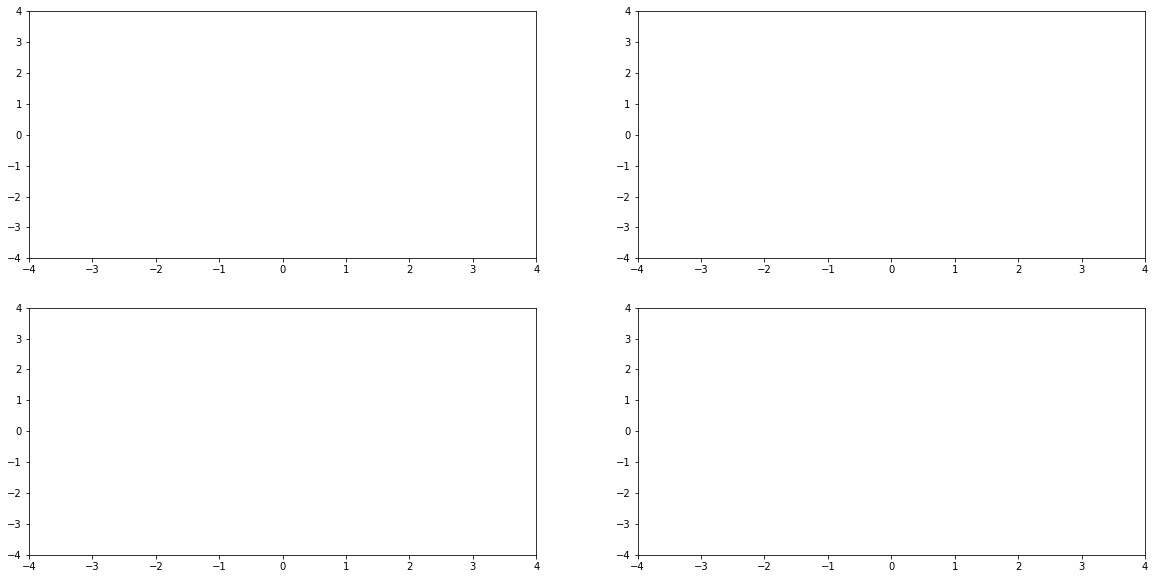

In [ ]:
#frames = 10 #test
frames = 200 #visualize

#dpi = 200 #beautiful
dpi = 50 #fast

anim = visualizer.animate_organism(graph, network, food=30, frames=frames) 
visualizer.save_animation_to_gif(anim, name, fps=10, dpi=dpi)

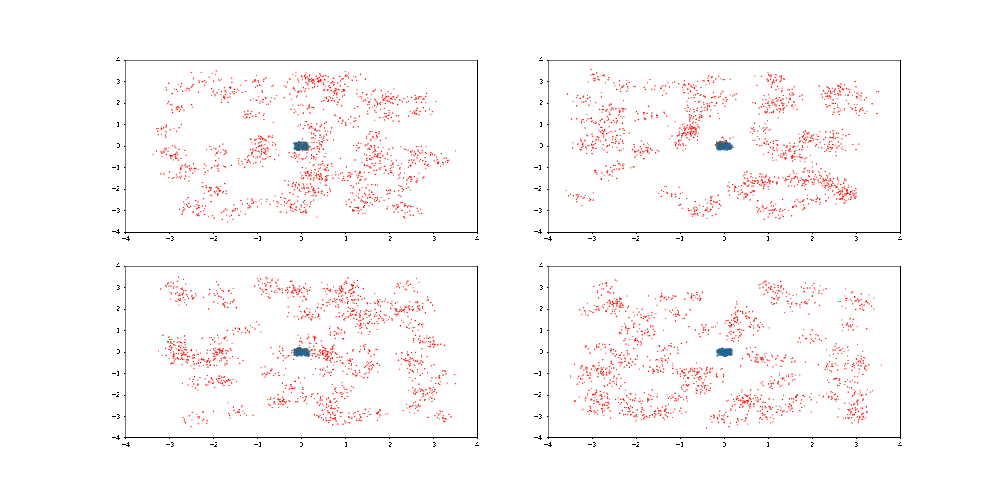

In [ ]:
Image('../animation/' + name + '.gif')

In [ ]:
%%javascript
IPython.notebook.save_notebook()

<IPython.core.display.Javascript object>

#### Visualization of loss:

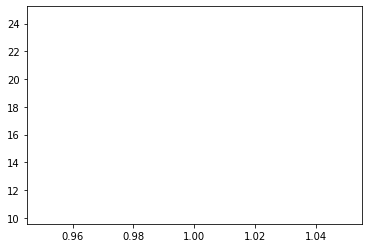

In [ ]:
import matplotlib.pyplot as plt
losses = trainer.logger_df
#print(losses)
#plt.plot(losses.stepsize)

plt.plot(losses.median_eval)
plt.plot(losses.pop_best_eval)
plt.plot(losses.mean_eval)
#plt.legend(('median_eval', 'pop_best_eval', 'mean eval'))
plt.show()